# Data Mining Project- Part I

In this notebook, we analyze "DM2425_ABCDEats_DATASET.csv" focusing on data processing, cleaning, analysis, visualization, and feature selection.
##### **1. Importing Packages and Main Dataframe**
##### **2. Exploring the Dataset**  
##### **3. Data Cleaning and Treatment**   
##### **4. Feature Selection**   
##### **5. Save Preprocessed Data**  
**Work developed by:**  
Maria Pereira 20240314  
Miguel Mangerona 20240595  
Rita Morgadito 20240611

### **1.** Importing the necessary packages and the main dataframe ### 

In [273]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE

In [274]:
originaldata=pd.read_csv("DM2425_ABCDEats_DATASET.csv")

Creating a copy of the original data before any changes

In [275]:
df=originaldata.copy()

### **2.** Exploring the dataset ###

#### 2.1 Initial analysis of the dataset by displaying the first and last rows ####

In [276]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [277]:
df.tail()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [278]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 31888 rows and 56 columns.


#### 2.2 Summarizing essential statistics to understand the dataset's structure and the significance of each feature ####

In [279]:
# Display only columns with missing values
missing_values_all = df.isnull().sum()
missing_values = missing_values_all[missing_values_all > 0]

# Display the columns with missing values
print(missing_values)


customer_age     727
first_order      106
HR_0            1165
dtype: int64


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

At first glance with the .info(), we can highlight some points to revisit later:
* ``customer_age`` is set as float, but ages can only be integer numbers
* ``first_order `` is set as float, but ``last_order`` is set as interger
* ``customer_age``, ``HR_0`` and ``first_order`` have a lot of missing data



In [281]:
# Identify metric (numerical) features
metric_features = df.select_dtypes(include=['number']).columns.tolist()

# Identify non-metric (categorical) features
non_metric_features = df.select_dtypes(exclude=['number']).columns.tolist()

# Print results
print("Metric Features:", metric_features)
print("Non-Metric Features:", non_metric_features)

Metric Features: ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
Non-Metric Features: ['customer_id', 'customer_region', 'last_promo', 'payment_method']


In [282]:
#Checking statistics of the columns with numerical type
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [283]:
#Checking statistics of the columns with object type
df.describe(include="object").T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


#### 2.3 Exploring categorical variables and numerical variables ####

As followed we can see that we have:
* 9 possible regions
* 4 possible promotion/ discount types
* 3 possible payment methods

To check that, will see which are the unique values for each one

In [284]:
#Showing which are the not numerical columns, and their corresponding values (unique values only)
non_numerical_columns = df.select_dtypes(exclude=['number']).columns

for column in non_numerical_columns:
    unique_values = df[column].unique()
    print(f"Column name: {column}")
    print(f"Corresponding values: {unique_values}\n")


Column name: customer_id
Corresponding values: ['1b8f824d5e' '5d272b9dcb' 'f6d1b2ba63' ... 'f74ad8ce3f' 'f7b19c0241'
 'fd40d3b0e0']

Column name: customer_region
Corresponding values: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']

Column name: last_promo
Corresponding values: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']

Column name: payment_method
Corresponding values: ['DIGI' 'CASH' 'CARD']



The customer_id will be our index, as it is unique to each user. Let's start by exploring this variable

In [285]:
df[df['customer_id'].duplicated(keep=False)]


,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0


The customer_id column as a lot of duplicated data, but the data in every column is repeated. So probably it's better to remove the duplicates to avoid redundancy.

In [286]:
df = df.drop_duplicates()

In [287]:
#Verifying that it worked
df[df['customer_id'].duplicated(keep=False)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23


In [288]:
#Checking for missing values
df["customer_id"].isna().sum()

0

Setting the customer_id as the index of the df

In [289]:
df = df.set_index('customer_id', drop=False)


### Important visualizations before any changes

In [290]:
#Underage customers
df[(df['customer_age'] <= 18) & (df['customer_age'] != 0)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
4eff9f04bf,4eff9f04bf,4660,18.0,2,3,1,0.0,4,DELIVERY,CARD,...,0,0,1,0,1,0,0,0,0,0
e79f867434,e79f867434,8670,15.0,2,3,1,0.0,5,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
63cb294ad9,63cb294ad9,8670,16.0,5,8,1,0.0,13,-,CARD,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0349679dc2,0349679dc2,-,17.0,1,2,0,89.0,89,FREEBIE,DIGI,...,0,0,0,0,0,1,0,0,0,0
d81ddff26a,d81ddff26a,4660,17.0,1,2,0,89.0,89,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
2e8012fcd4,2e8012fcd4,8670,18.0,1,1,1,NaN,0,-,CASH,...,0,0,0,0,0,0,0,0,0,0


### **3.** Data Cleaning/ Treating ### 

We'll create a list for the features created to later on being able to check statistics and work with them

In [291]:
#Creating a new features list
new_features = []

#### 3.1 Identifying and treating anomalous values ####

#### Customer Region ####

In [292]:
#Visualizing which regions exist
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [293]:
#Replacing empty customer regions with Nan
df["customer_region"]=df["customer_region"].replace("-",np.nan)

In [294]:
df["customer_region"].isna().sum()

442

In [295]:
# Get value counts of regions
region_counts = df['customer_region'].value_counts()

# Get total count including NaN values
total_count = len(df['customer_region'])  # This includes NaN values

# Display the frequency of each unique value
print("Region distribution:")
for region, count in region_counts.items():
    percentage = (count / total_count) * 100
    print(f"Region {region}: {count} ({percentage:.2f}%)")

# Display NaN count
nan_count = df['customer_region'].isna().sum()
nan_percentage = (nan_count / total_count) * 100
print(f"NaN values: {nan_count} ({nan_percentage:.2f}%)")

# Get dominant region info
dominant_region = region_counts.idxmax()
dominant_count = region_counts.max()
dominant_percentage = (dominant_count / total_count) * 100

print(f"\nDominant Region: {dominant_region}")
print(f"Frequency: {dominant_count} ({dominant_percentage:.2f}%)")


Region distribution:
Region 8670: 9761 (30.62%)
Region 4660: 9550 (29.96%)
Region 2360: 8829 (27.70%)
Region 2440: 1483 (4.65%)
Region 4140: 857 (2.69%)
Region 8370: 495 (1.55%)
Region 2490: 445 (1.40%)
Region 8550: 13 (0.04%)
NaN values: 442 (1.39%)

Dominant Region: 8670
Frequency: 9761 (30.62%)


As customer_region is a categorical variable, we decided to fill the missing values with the mode (8670) because the missing values represent only 1.39% of the data and there is a clear dominant region that accounts for 30.62% of the records.

In [296]:
# Fill missing values in 'customer_region' with the mode (most frequent value)
mode_value = df['customer_region'].mode()[0]  # Get the mode (first value if multiple modes exist)
df['customer_region'].fillna(mode_value, inplace=True)

C:\Users\migue\AppData\Local\Temp\ipykernel_17388\337886409.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_region'].fillna(mode_value, inplace=True)


Since the first number of each unique regions is probably close to the others with the same first number. Let's divide the regions by grouping them by single numbers, following the previous logic

In [297]:
#We will assume that the 1st number of the region determines which city it refers to
#Thus, regions starting with 2 will be assumed to be in the same city and etc

df['customer_city'] = df['customer_region'].str[0]
df['customer_city'].unique()
new_features.append('customer_city')


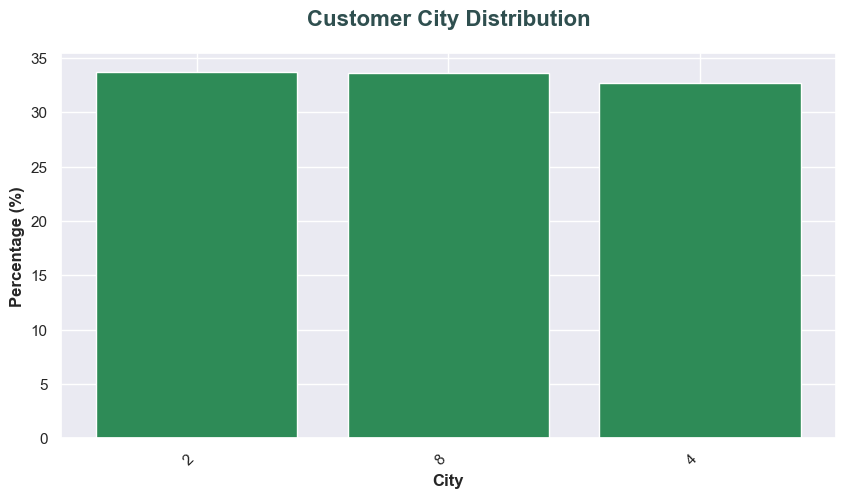

In [298]:
# Calculate the percentage distribution
city_percentage = df['customer_city'].value_counts(normalize=True) * 100

# Plotting the bar chart with a linear scale (default)
plt.figure(figsize=(10, 5))
plt.bar(city_percentage.index, city_percentage, color='seagreen')

# Customizing the chart
plt.title("Customer City Distribution", fontsize=16, fontweight='bold', color='darkslategray', pad=20)
plt.xlabel("City", fontsize=12, fontweight='bold')
plt.ylabel("Percentage (%)", fontsize=12, fontweight='bold')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

#### Vendor Count ####

In [299]:
df["vendor_count"].value_counts().sort_index()

vendor_count
0      138
1     9059
2     8547
3     5173
4     2984
5     1875
6     1166
7      816
8      594
9      396
10     285
11     219
12     146
13     108
14     101
15      62
16      41
17      34
18      26
19      20
20      22
21       9
22       7
23      12
24       6
25       6
26       2
27       5
28       3
29       2
30       3
31       1
32       2
34       2
35       1
40       1
41       1
Name: count, dtype: int64

Since the Vendor Count is "Number of unique vendors the customer has ordered from", we can only assume that the customer with value 0 haven't made any order yet. But we'll check that later.

#### Product Count ####

In [300]:
df["product_count"].isna().sum()

0

In [301]:
df[df["product_count"] == 0].shape[0]

156

In [302]:
df[df["product_count"] < 0].shape[0]

0

This means that are 156 customers, registed in the service that haven't made any order yet. Let's check if those are the same with the vendor_count=0

In [303]:
df[(df["product_count"] == 0) & (df["vendor_count"] == 0)].shape[0]

138

Since the number of customers with 0 vendor_count and 0 product_count is the same, we can conclude that these customers haven't made any order yet. But now this means that the other 18 customers that haven't made any order, should have the same vendor_count and product_count. So we need to replace them with the same value.

In [304]:
df.loc[(df["product_count"] == 0) & (df["vendor_count"] != 0), "vendor_count"] = df["product_count"]

In [305]:
#Veryfing that it works
df[(df["product_count"] == 0) & (df["vendor_count"] == 0)].shape[0]

156

#### Is Chain ####

In [306]:
df["is_chain"].value_counts().sort_index()

is_chain
0     6099
1     8543
2     5892
3     3696
4     2165
5     1380
6      946
7      679
8      500
9      373
10     291
11     248
12     169
13     152
14     138
15      89
16      68
17      55
18      65
19      35
20      34
21      29
22      26
23      20
24      23
25      14
26      20
27      16
28      13
29      10
30       9
31       9
32       8
33       6
34       6
35       4
36       5
37       4
38       1
39       2
40       5
42       2
43       5
44       1
45       4
46       1
47       1
48       2
49       1
54       1
56       1
61       1
63       1
65       1
67       1
73       1
75       1
80       1
81       1
83       1
Name: count, dtype: int64

We we're expecting to see a binomial type of variable (0 if the customer didn't ordered from a chain and 1 if the customer did ordered from a chain). Since that is not the case, we need to explore the values. To do that, we are going to see the distribution of this feature.

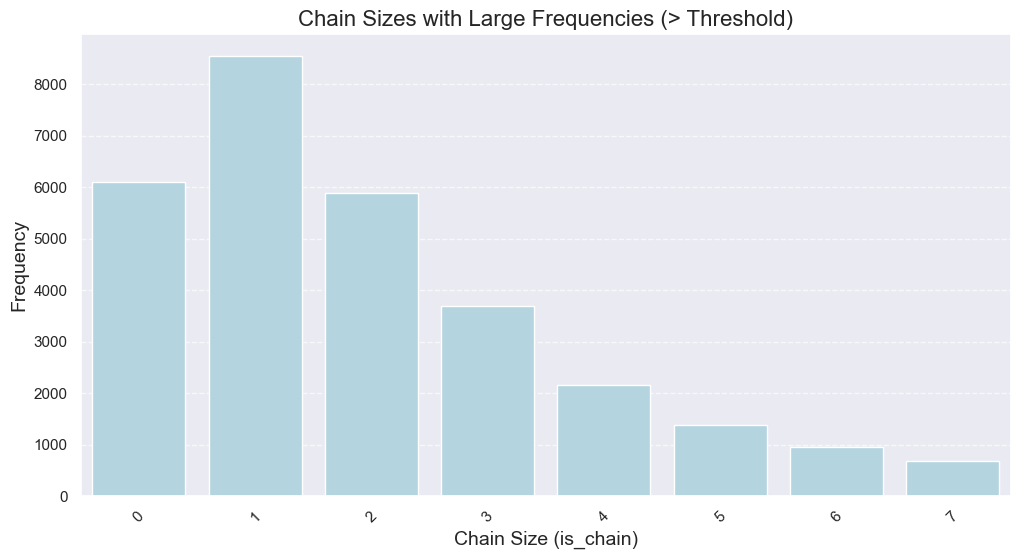

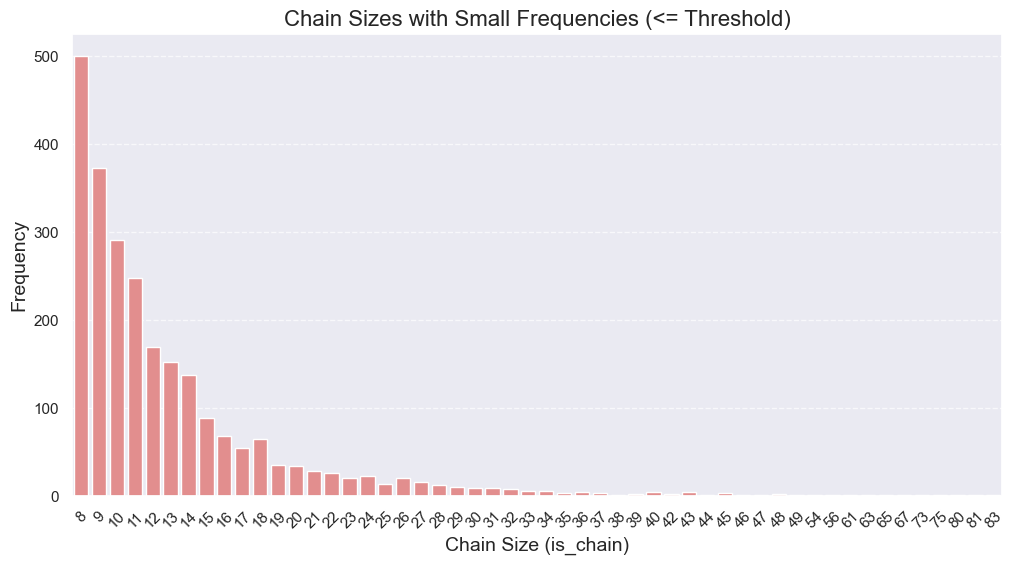

In [307]:
# Split into two groups: large and small frequencies
threshold = 500  # Define a threshold for splitting
large_freq = df["is_chain"].value_counts()[df["is_chain"].value_counts() > threshold]
small_freq = df["is_chain"].value_counts()[df["is_chain"].value_counts() <= threshold]

# Plot large frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=large_freq.index, y=large_freq.values, color='lightblue')
plt.title("Chain Sizes with Large Frequencies (> Threshold)", fontsize=16)
plt.xlabel("Chain Size (is_chain)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot small frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=small_freq.index, y=small_freq.values, color='lightcoral')
plt.title("Chain Sizes with Small Frequencies (<= Threshold)", fontsize=16)
plt.xlabel("Chain Size (is_chain)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

It looks that this feature can also be used to observe the type of chain. Assuming that higher chains would probably have higher frequency values, we can divide the chains into different categories. So that for each customer we will know if the customer orders from a chain, and if he does, from which type.

In [308]:

chain_frequencies = df['is_chain'].value_counts().to_dict()
df["chain_frequency"] = df["is_chain"].map(chain_frequencies)

# Step 3: Define a function to categorize chains
def categorize_chain(row):
    if row["is_chain"] == 0:
        return "Non-Chain"
    elif row["chain_frequency"] > 500:
        return "Large Chain"
    elif 100 <= row["chain_frequency"] <= 500:
        return "Medium Chain"
    elif row["chain_frequency"] < 100:
        return "Small Chain"
    else:
        return "Non Chain"
    
df["chain_category"] = df.apply(categorize_chain, axis=1)
new_features.append('chain_category')

In [309]:
#We can also drop chain frequency since it would not be useful
df.drop(columns=['chain_frequency'], inplace=True)

In [310]:
df["chain_category"].value_counts()

chain_category
Large Chain     23301
Non-Chain        6099
Medium Chain     1871
Small Chain       604
Name: count, dtype: int64

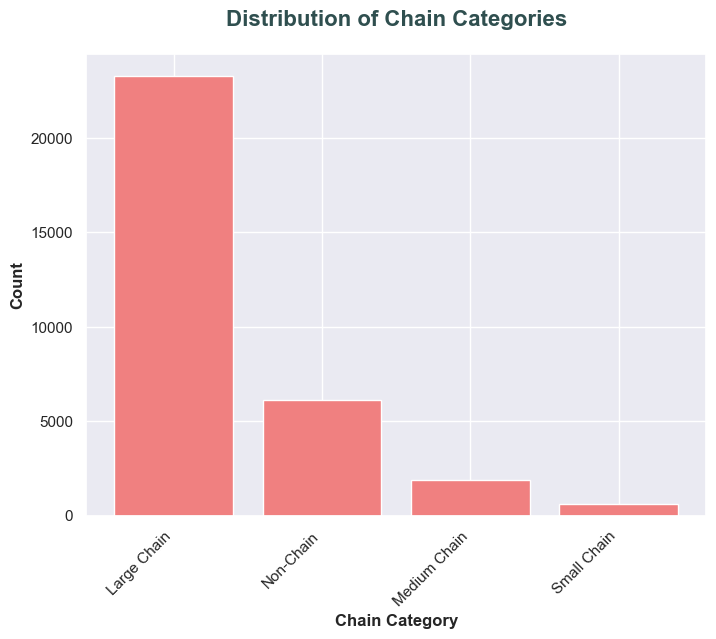

In [311]:
chain_category_count = df['chain_category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8,6))
plt.bar(chain_category_count.index, chain_category_count, color='lightcoral')

# Customizing the chart
plt.title("Distribution of Chain Categories", fontsize=16, fontweight='bold', color='darkslategray', pad=20)
plt.xlabel("Chain Category", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

# Rotating the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()


#### First Order ####

In [312]:
df["first_order"].isna().sum()

106

Let's start by analyzing the cases where the first order has a missing value, and which variable can explain it

In [313]:
no_orders = df[df['first_order'].isna() & (df['last_order'] == 0)]

# Display the relevant columns
print(no_orders[['first_order', 'last_order', 'product_count']])

             first_order  last_order  product_count
customer_id                                        
0366fbb035           NaN           0              1
039d7c8a20           NaN           0              1
04c9d25c93           NaN           0              1
09118ae9e7           NaN           0              1
0d1f298bbd           NaN           0              1
...                  ...         ...            ...
f4e366c281           NaN           0              1
f6b6709018           NaN           0              1
f74ad8ce3f           NaN           0              1
f7b19c0241           NaN           0              1
fd40d3b0e0           NaN           0              1

[106 rows x 3 columns]


In [314]:
orders = df[(df['product_count']==1)]

# Display the relevant columns
print(orders[['first_order', 'last_order', 'product_count']])

             first_order  last_order  product_count
customer_id                                        
0d18e5416b           1.0           1              1
10e5701adb           1.0           1              1
1415578e02           1.0           1              1
1d02e614b4           1.0           1              1
237e4e7aaf           1.0           1              1
...                  ...         ...            ...
f4e366c281           NaN           0              1
f6b6709018           NaN           0              1
f74ad8ce3f           NaN           0              1
f7b19c0241           NaN           0              1
fd40d3b0e0           NaN           0              1

[4690 rows x 3 columns]


This tells us that there are 2 scenarios:
* The first order was placed after the start of the dataset, so the of first order and last order value is equal to 1.
* The first order was placed before the start of the dataset, so the of first order and last order should be equal to 0. *

Now we need to switch the NaN values to 0 according to our findings, and the switch the variable datatype

In [315]:
df['first_order'] = df['first_order'].fillna(0)

In [316]:
df['first_order'] = df['first_order'].astype(int)

#### Last Order ####

In [317]:
df["last_order"].isna().sum()

0

In [318]:
df["last_order"].value_counts().sort_index()

last_order
0      106
1       56
2       64
3       85
4       78
      ... 
86    1046
87    1176
88    1438
89    1711
90      32
Name: count, Length: 91, dtype: int64

The difference between the last order and the first order, can be useful to take conclusions about the activity of the customer in the service 

In [319]:
#Creating a column that stores the calculation of days since the first order
df['engagement_duration'] = df['last_order'] - df['first_order']
new_features.append('engagement_duration')

In [320]:
df['avg_order_frequency'] = df['product_count'] / df['engagement_duration']
new_features.append('avg_order_frequency')

#### Last Promo ####

In [321]:
df["last_promo"].value_counts()

last_promo
-           16744
DELIVERY     6282
DISCOUNT     4496
FREEBIE      4353
Name: count, dtype: int64

In [322]:
df['last_promo'] = df['last_promo'].replace("-", "No promo")

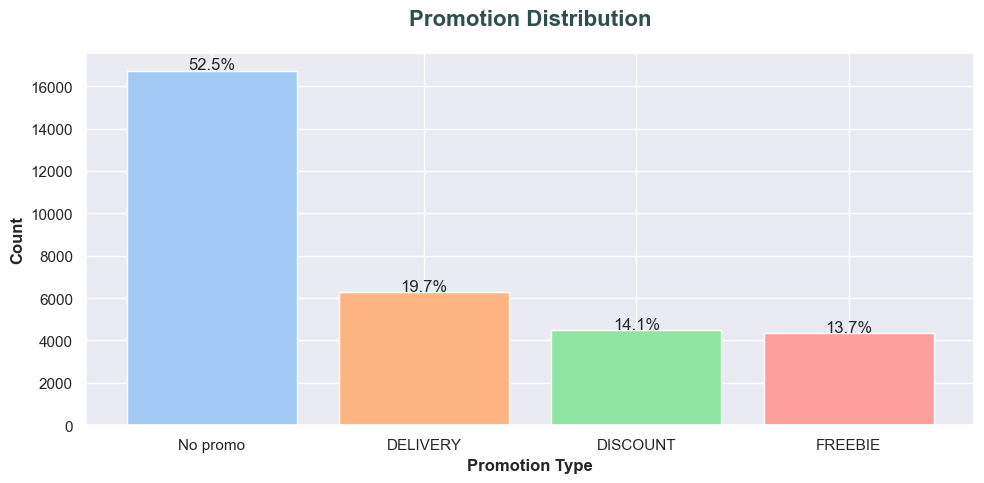

In [323]:
# Configuring the color palette
colors = sns.color_palette("pastel")

# Calculate the value counts for the 'last_promo' column
promo_count = df['last_promo'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 5))  # Setting figure size
plt.bar(promo_count.index, promo_count, color=colors)

# Customizing the chart
plt.title("Promotion Distribution", fontsize=16, fontweight='bold', color='darkslategray', pad=20)
plt.xlabel("Promotion Type", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

# Adding percentages on top of the bars
for i, value in enumerate(promo_count):
    plt.text(i, value + 50, f'{value / promo_count.sum() * 100:.1f}%', ha='center', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

#### Payment Method ####

In [324]:
#visualizing the available payment methods
df['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

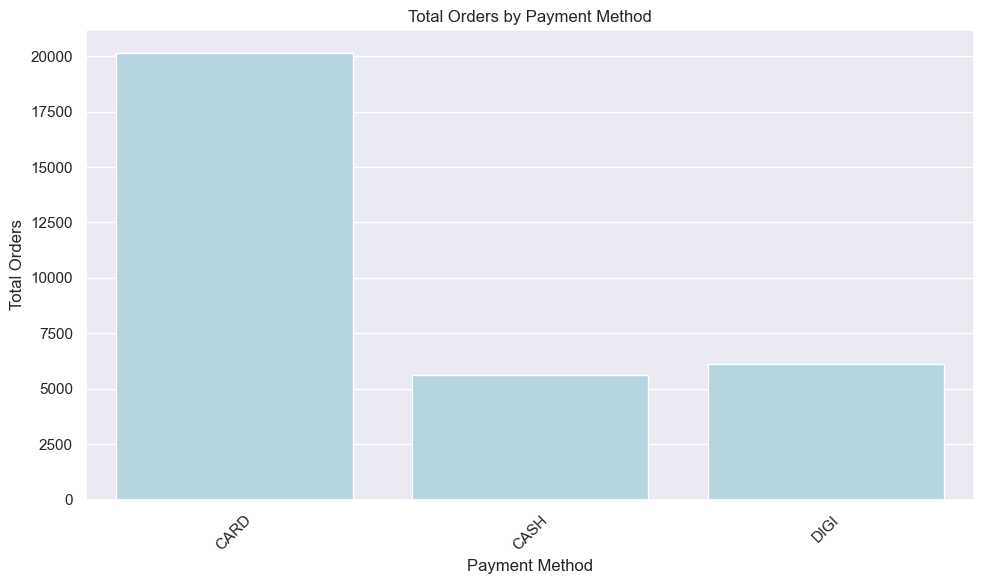

In [325]:
total_orders = df.groupby('payment_method').size().reset_index(name='total_orders')

plt.figure(figsize=(10, 6))
sns.barplot(data=total_orders, x='payment_method', y='total_orders', color='lightblue')
plt.title('Total Orders by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



#### CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc. ####

We are going to create a feature that store the total amount of money spent in every cuisine type

In [326]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_features.append('tot_value_cui')

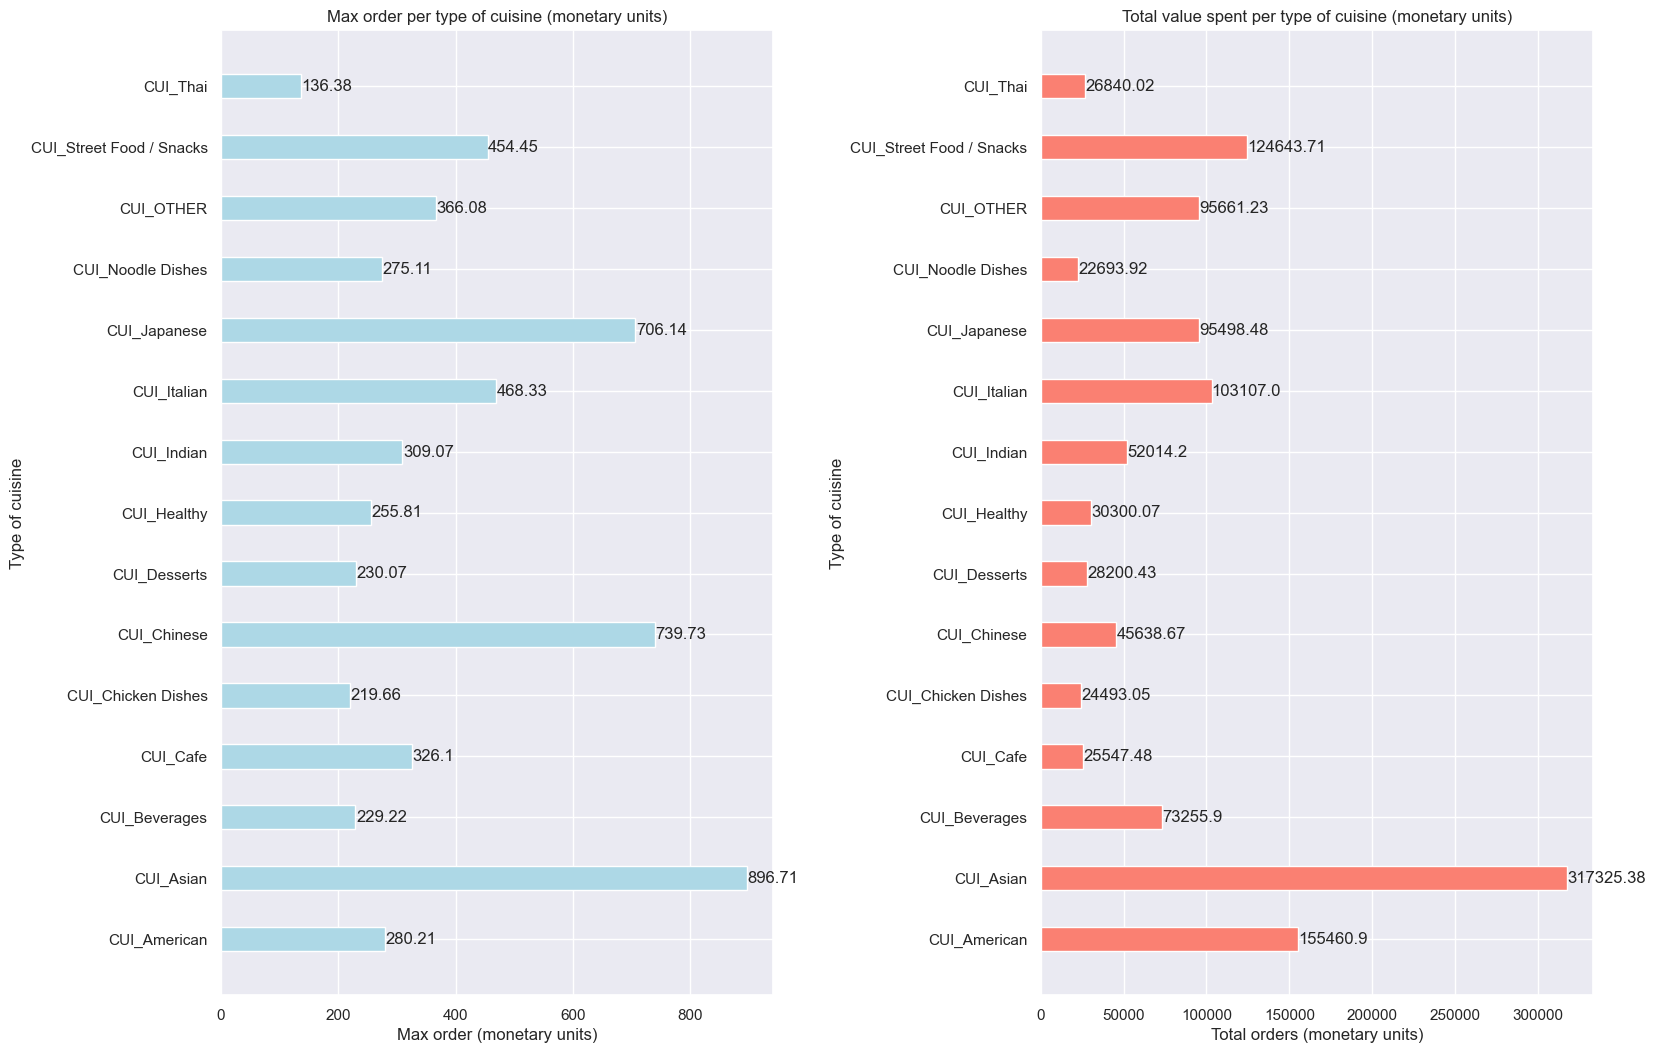

In [327]:
max_values = df[cui_columns].max()
sum_values = df[cui_columns].sum().round(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 11))

#graph of the bigger order per cuisine type 
axes[0].barh(max_values.index, max_values.values, color='lightblue', height=0.4)
axes[0].set_title('Max order per type of cuisine (monetary units)')
axes[0].set_xlabel('Max order (monetary units)')
axes[0].set_ylabel('Type of cuisine')
for i in range(len(max_values)):
    axes[0].text(max_values.values[i] + 1, i, str(max_values.values[i]), va='center', fontsize=12)

#graph of the total value in monetary units of the cuisine type 
axes[1].barh(sum_values.index, sum_values.values, color='salmon', height=0.4)
axes[1].set_title('Total value spent per type of cuisine (monetary units)')
axes[1].set_xlabel('Total orders (monetary units)')
axes[1].set_ylabel('Type of cuisine')
for i in range(len(sum_values)):
    axes[1].text(sum_values.values[i] + 1, i, str(sum_values.values[i]),va='center', fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

#### DOW_0 to DOW_6 ####

In [328]:
df['preferred_order_day'] = df[[f'DOW_{i}' for i in range(7)]].idxmax(axis=1).str.replace('DOW_', '').astype(int)

new_features.append('preferred_order_day')

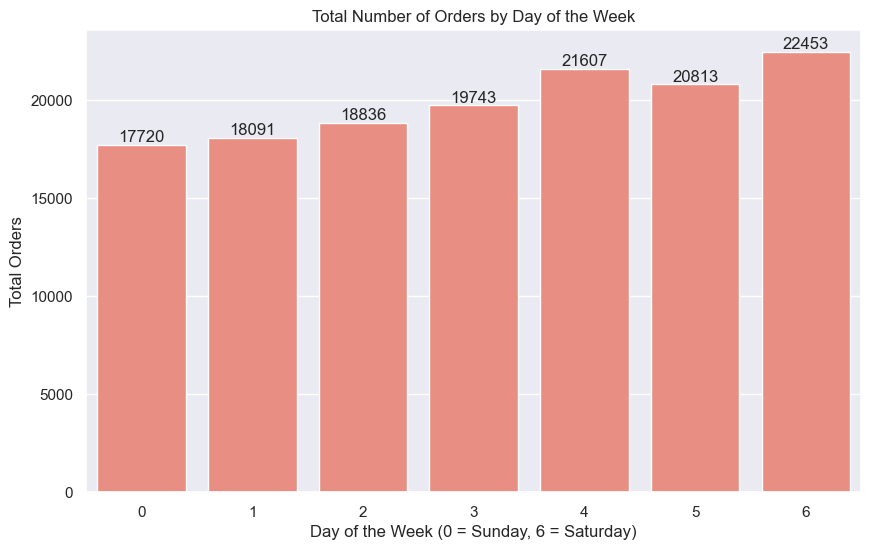

In [329]:
weekly_columns = [f'DOW_{i}' for i in range(7)]

weekly_totals = df[weekly_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_totals.index.str.replace("DOW_", ""), y=weekly_totals.values, color="salmon")

plt.title('Total Number of Orders by Day of the Week')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Total Orders')

for index, value in enumerate(weekly_totals.values):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom')
plt.show()


#### HR_0 to HR_23 ####


In [330]:
df["HR_0"].isna().sum()

1164

Since the number of orders should be the same if we sum all the DOW and HR. Let's start by checking that, for a random customer without any missing value in the HR_0

In [331]:
# Select a customer without missing values in the HR columns
customer_id = df[df[[f'HR_{i}' for i in range(24)]].notnull().all(axis=1)].iloc[0]['customer_id']

# Sum the DOW columns for that customer
dow_sum = df[df['customer_id'] == customer_id][[f'DOW_{i}' for i in range(7)]].sum(axis=1).values[0]

# Sum the HR columns for that customer
hr_sum = df[df['customer_id'] == customer_id][[f'HR_{i}' for i in range(24)]].sum(axis=1).values[0]

# Check if the sums are equal
print(f"Customer ID: {customer_id}")
print(f"Sum of DOW columns: {dow_sum}")
print(f"Sum of HR columns: {hr_sum}")

if dow_sum == hr_sum:
    print("The sum of DOW and HR columns are equal.")
else:
    print("The sum of DOW and HR columns are NOT equal.")

Customer ID: 1b8f824d5e
Sum of DOW columns: 2
Sum of HR columns: 2.0
The sum of DOW and HR columns are equal.


It makes sense. So we are going to fill the missing data with the substration of the total number of orders and the HR orders that have values (using the DOW)

In [332]:
# Loop over each customer and fill missing HR_0 values
for customer_id in df['customer_id'].unique():
    # Get the row for the current customer
    customer_data = df[df['customer_id'] == customer_id]
    
    # Skip customers where HR_0 is not missing
    if not pd.isnull(customer_data['HR_0'].values[0]):
        continue
    
    # Calculate the total number of orders from DOW columns
    total_orders = customer_data[[f'DOW_{i}' for i in range(7)]].sum(axis=1).values[0]
    
    # Calculate the sum of orders in HR_1 to HR_23
    hr_orders = customer_data[[f'HR_{i}' for i in range(1, 24)]].sum(axis=1).values[0]
    
    # Calculate the missing HR_0 value
    missing_hr_0 = total_orders - hr_orders
    
    # Fill the missing value in HR_0
    df.loc[df['customer_id'] == customer_id, 'HR_0'] = missing_hr_0

# Check the result for some customers
print(df[['customer_id', 'HR_0']].head())

            customer_id  HR_0
customer_id                  
1b8f824d5e   1b8f824d5e   0.0
5d272b9dcb   5d272b9dcb   0.0
f6d1b2ba63   f6d1b2ba63   0.0
180c632ed8   180c632ed8   0.0
4eb37a6705   4eb37a6705   0.0


In [333]:
df['preferred_order_hour'] = df[[f'HR_{i}' for i in range(24)]].idxmax(axis=1).str.replace('HR_', '').astype(int)
new_features.append('preferred_order_hour')

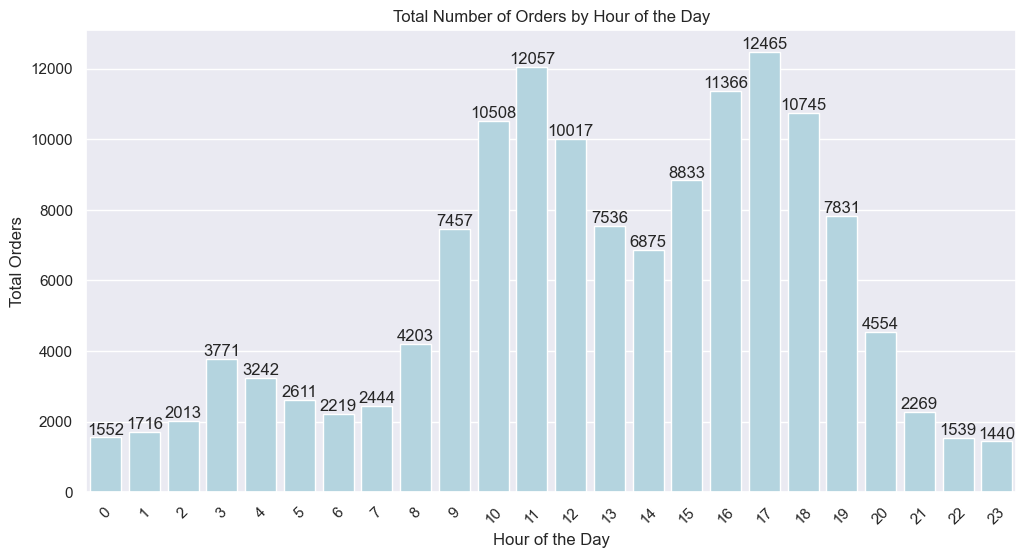

In [334]:

hourly_columns = [f'HR_{i}' for i in range(24)]

hourly_totals = df[hourly_columns].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_totals.index.str.replace("HR_", ""), y=hourly_totals.values, color="lightblue")

plt.title('Total Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

for index, value in enumerate(hourly_totals.values):
    plt.text(index, value, int(value), ha='center', va='bottom')

plt.show()


#### Customer Age ####

In [335]:
df["customer_age"].isna().sum()

727

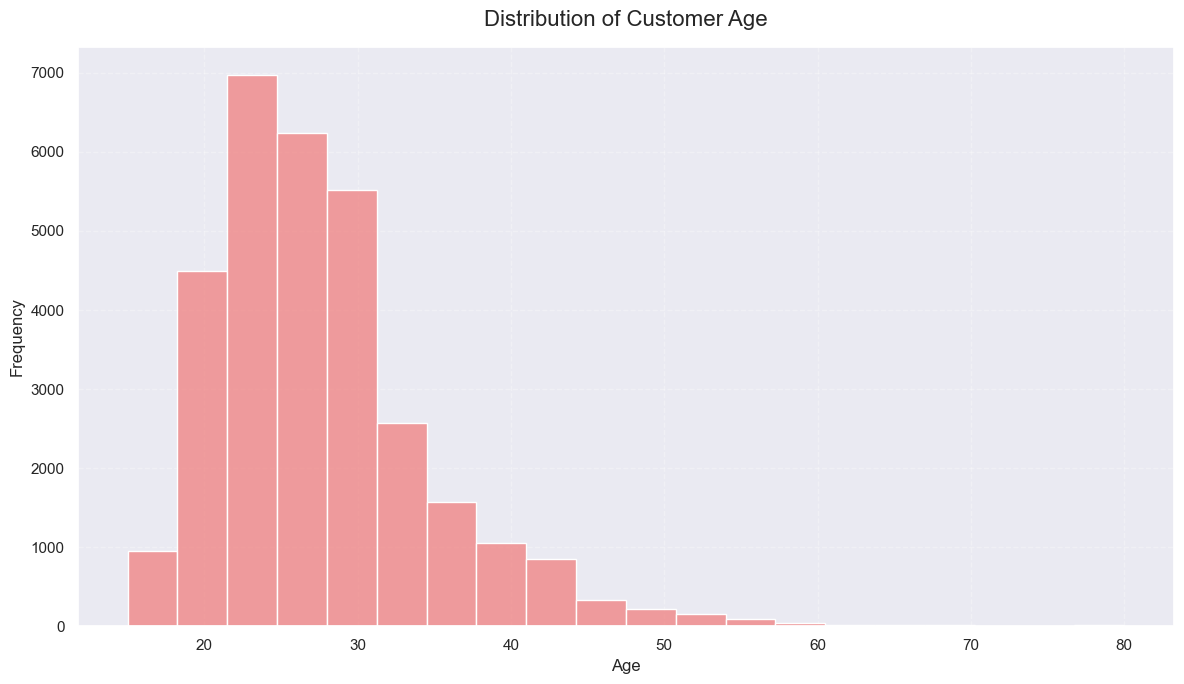

In [336]:
# Set figure size
plt.figure(figsize=(12, 7))

# Create simple histogram
sns.histplot(data=df['customer_age'].dropna(), 
            bins=20,
            color='lightcoral',
            edgecolor='white')

# Customize the plot
plt.title('Distribution of Customer Age', 
          fontsize=16, 
          pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout
plt.tight_layout()

plt.show()

In order to treat the last feature with missing values we observed that: the age distribution shows a peak around 22-25 years, a long right tail extending toward higher ages, and a concentration of most customers between 20 and 40 years old.
We've thought about two methods to replace the missing values: KNN or the median.
We chose KNN imputation over the median because it leverages relationships between age and other correlated features.


In [337]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df[metric_features] = imputer.fit_transform(df[metric_features])

In [338]:
#Because the KNN gives us decimal values and ages can't be decimals, we are going to round the values and convert them to integer
df['customer_age'] = df['customer_age'].round().astype(int)

In [339]:
#Rounding up the midpoints
def categorize_age(age):
    if age <= 17:
        return 16  # Midpoint of 'Minors' (Assuming 15 is the lowest value))
    elif 18 <= age <= 33:
        return 26  # Midpoint of 'Young Adults'
    elif 34 <= age <= 49:
        return 42  # Midpoint of 'Middle-Adults'
    elif 50 <= age <= 65:
        return 58  # Midpoint of 'Older Adults'
    elif age >= 66:
        return 73  # Midpoint of 'Seniors (assuming 80 is the highest value)
    else:
        return np.nan  # Return NaN for any invalid or missing age

# Apply the function to create the 'age_category' column
df['age_category'] = df['customer_age'].apply(categorize_age)
new_features.append('age_category')

In [340]:
df["age_category"].value_counts()

age_category
26    26328
42     4738
58      398
16      365
73       46
Name: count, dtype: int64

Now we have the ages divided by:
* Minors (16)
* Young Adults (25.5)
* Middle-Adults (41.5)
* Older Adults (57.5)
* Seniors (75.5)

#### Checking missing values after preprocessing ####

In [341]:
# Create a DataFrame showing only the columns with missing values
missing_values = df.isna().sum()

# Filter the missing values to display only the columns with missing data
missing_values = missing_values[missing_values > 0]

# Display the missing values
print(missing_values)


avg_order_frequency    156
dtype: int64


We'll stick with these missing values because:
* ``avg_order_frequency`` is related to the values were the denominator is zero 
This variable wont be used for clustering.

#### Checking Statistics for the new feature ####

In [342]:
df[new_features].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_city,31875,3,2,10757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chain_category,31875,4,Large Chain,23301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engagement_duration,31875.0,NaN,NaN,NaN,35.297129,29.43741,0.0,3.0,34.0,62.0,90.0
avg_order_frequency,31719.0,NaN,NaN,NaN,inf,NaN,0.022727,0.096774,0.179487,1.0,inf
tot_value_cui,31875.0,NaN,NaN,NaN,38.295857,46.410657,0.0,12.88,24.14,44.97,1418.33
preferred_order_day,31875.0,NaN,NaN,NaN,2.67291,2.032812,0.0,1.0,3.0,4.0,6.0
preferred_order_hour,31875.0,NaN,NaN,NaN,11.487122,5.38818,0.0,8.0,12.0,16.0,23.0
age_category,31875.0,NaN,NaN,NaN,28.731169,6.907517,16.0,26.0,26.0,26.0,73.0


In [343]:
for feature in new_features:
    dtype = df[feature].dtype  # Get the data type of the feature
    print(f"Data type of {feature}: {dtype}")

Data type of customer_city: object
Data type of chain_category: object
Data type of engagement_duration: int64
Data type of avg_order_frequency: float64
Data type of tot_value_cui: float64
Data type of preferred_order_day: int32
Data type of preferred_order_hour: int32
Data type of age_category: int64


In [344]:
#Adding new features to the metric and non metric list
# Identify metric (numerical) features
metric_features = df.select_dtypes(include=['number']).columns.tolist()


# Identify non-metric (categorical) features
non_metric_features = df.select_dtypes(exclude=['number']).columns.tolist()

# Print results
print("Metric Features:", metric_features)
print("Non-Metric Features:", non_metric_features)

Metric Features: ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'engagement_duration', 'avg_order_frequency', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']
Non-Metric Features: ['customer_id', 'customer_region', 'last_promo', 'payment_method', 'customer_city', 'chain_category']


#### Checking for the percentage of data kept from the original dataset (excluding the new features)

In [345]:
# Drop the new features
df_without_new_features = df.drop(columns=new_features)

# Calculate the percentage of data retained
percentage_kept = (df_without_new_features.size / originaldata.size) * 100

print(f"Percentage of data kept after removing new features: {percentage_kept:.2f}%")

Percentage of data kept after removing new features: 99.96%


#### 3.2 Vizualitions 

#### Total orders by city ####

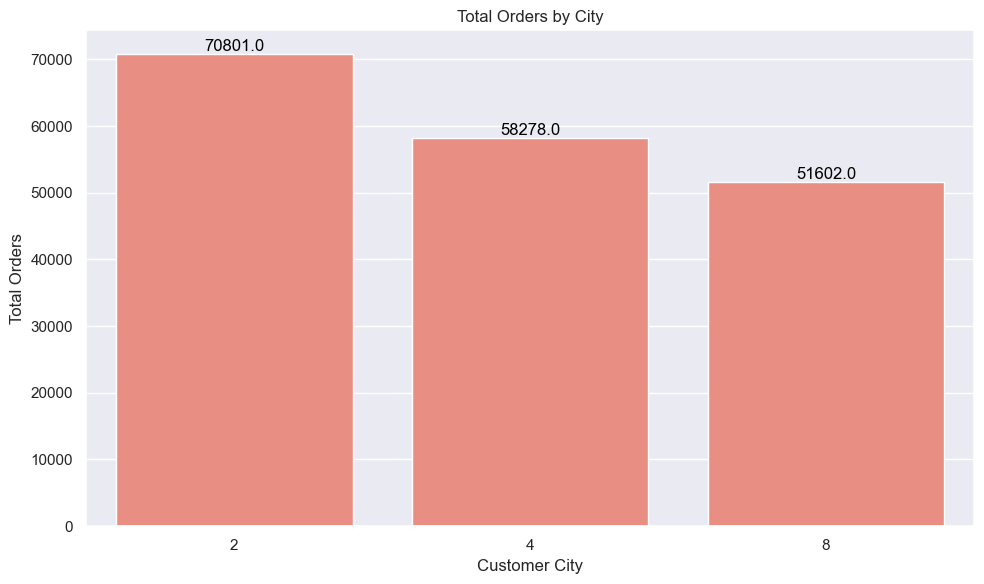

In [346]:
total_orders = df.groupby('customer_city')['product_count'].sum().reset_index(name='total_orders')

plt.figure(figsize=(10, 6))
sns.barplot(data=total_orders, x='customer_city', y='total_orders', color='salmon')
plt.title('Total Orders by City')
plt.xlabel('Customer City')
plt.ylabel('Total Orders')

for index, row in total_orders.iterrows():
    plt.text(index, row['total_orders'], row['total_orders'], color='black', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


#### Money spent by city ####

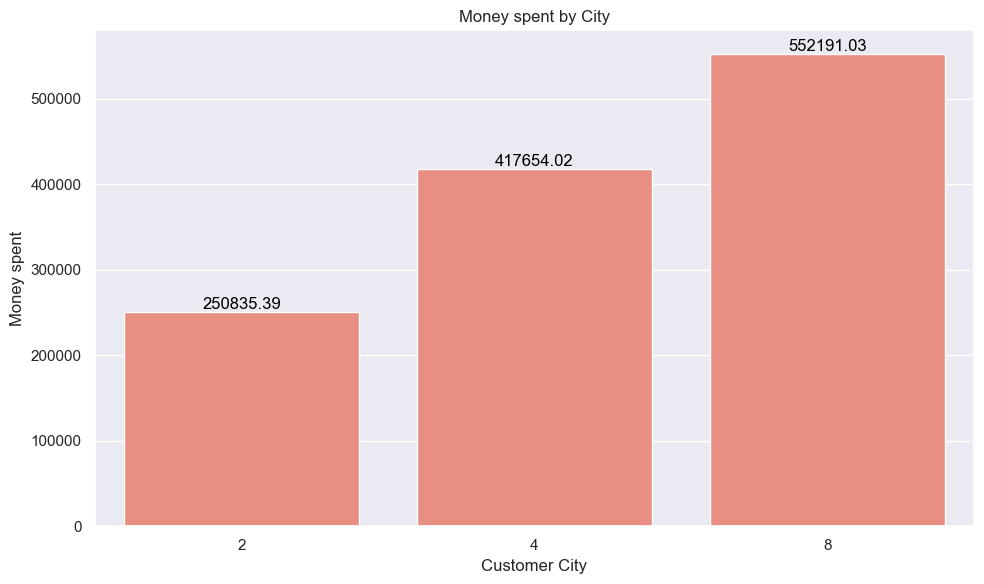

In [347]:
money_spent = df.groupby('customer_city')['tot_value_cui'].sum().reset_index(name='money_spent')

plt.figure(figsize=(10, 6))
sns.barplot(data=money_spent, x='customer_city', y='money_spent', color='salmon')
plt.title('Money spent by City')
plt.xlabel('Customer City')
plt.ylabel('Money spent')

for index, row in money_spent.iterrows():
    plt.text(index, row['money_spent'], row['money_spent'], color='black', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

##### Orders by Cuisine Type ####

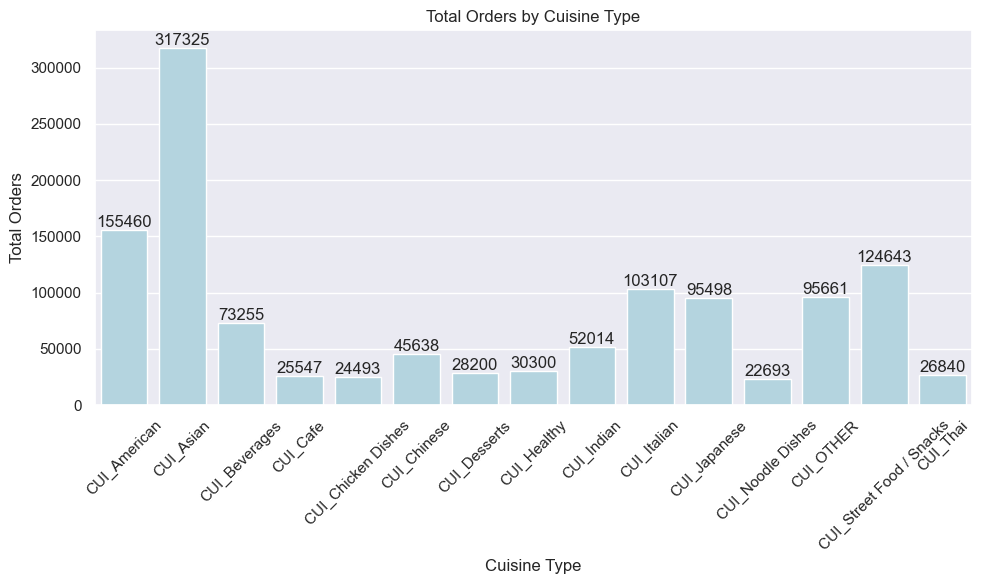

In [348]:
cuisine_columns = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                   'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                   'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
                   'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 
                   'CUI_Street Food / Snacks', 'CUI_Thai']

#creating a dataframe with the sum of orders by cuisine type 
total_cuisines = df[cuisine_columns].sum().reset_index()
total_cuisines.columns = ['Cuisine Type', 'Total Orders']
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cuisines, x='Cuisine Type', y='Total Orders', color='lightblue')
plt.title('Total Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Orders')
plt.xticks(rotation=45) 

for index, row in total_cuisines.iterrows():
    plt.text(index, row['Total Orders'], int(row['Total Orders']), ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### Cuisine Preferences by city ####

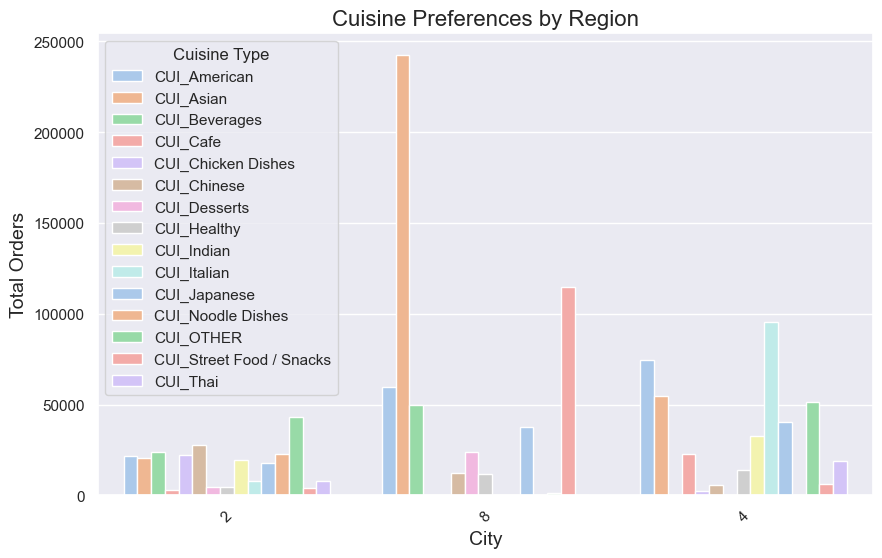

In [349]:
#sum of the orders per region per type of cuisine 
cui_columns = [col for col in df.columns if col.startswith('CUI')]
cuisine_counts = df[cui_columns].sum().reset_index()
cuisine_counts.columns = ['Cuisine Type', 'Count']

region_cuisine = pd.DataFrame()

for region in df['customer_city'].unique():
    region_data = df[df['customer_city'] == region][cui_columns].sum().reset_index()
    region_data.columns = ['Cuisine Type', 'Count']
    region_data['Region'] = region
    region_cuisine = pd.concat([region_cuisine, region_data], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_cuisine, x='Region', y='Count', hue='Cuisine Type', palette='pastel')

plt.title('Cuisine Preferences by Region', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45)

plt.legend(title='Cuisine Type')
plt.show()

##### Average Orders: weekends and weekdays ####

   Category   Orders
0  Weekdays  19818.0
1  Weekends  20086.5


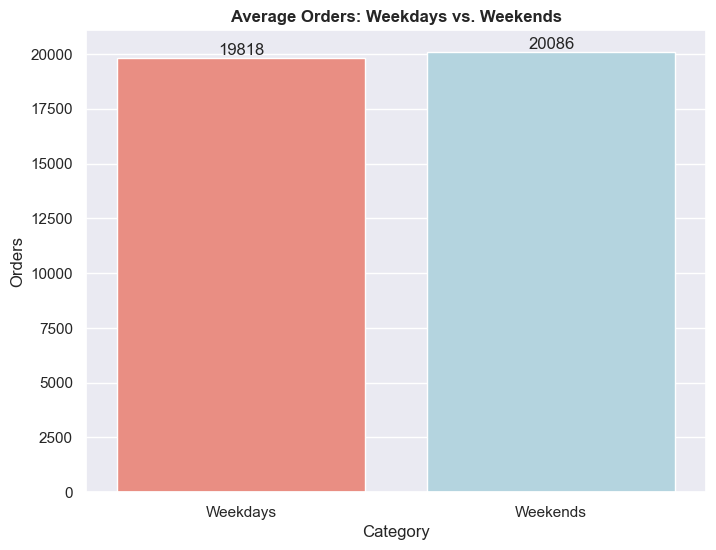

In [350]:
weekday_columns = ['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']
weekend_columns = ['DOW_0', 'DOW_6']
weekday_orders = df[weekday_columns].sum().sum() 
weekend_orders = df[weekend_columns].sum().sum() 


labels = ['Weekdays', 'Weekends']
sizes = [weekday_orders/5, weekend_orders/2]
colors = ['seagreen', 'peru']

orders_data = {'Category': labels, 'Orders': sizes}

DOW_orders_df = pd.DataFrame(orders_data)
print(DOW_orders_df)

plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Orders', data=DOW_orders_df, hue='Category', palette=['salmon', 'lightblue'], legend=False)
plt.title('Average Orders: Weekdays vs. Weekends', fontweight='bold')
plt.ylabel('Orders')
plt.xlabel('Category')

for index, row in DOW_orders_df.iterrows():
    plt.text(index, row['Orders'], int(row['Orders']), ha='center', va='bottom')

plt.show()


##### Box plot of customer age ####

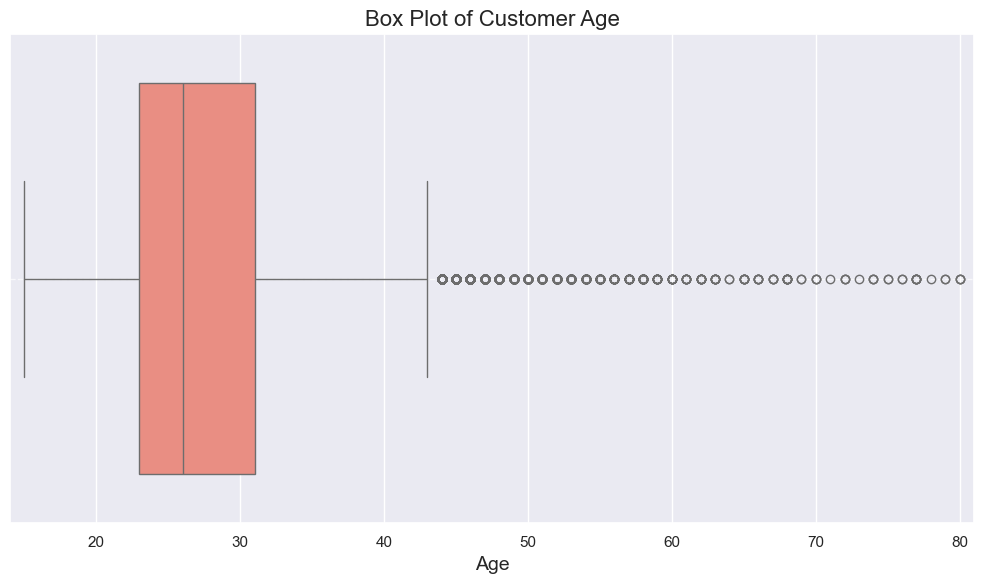

In [351]:
if df.index.has_duplicates:
    df = df.reset_index(drop=True)

plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['customer_age'], color='salmon')
plt.title('Box Plot of Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=14)

# add lines 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(df['customer_age'].min() - 1, df['customer_age'].max() + 1)  
plt.tight_layout()
plt.show()

##### Average value spending by age category ####

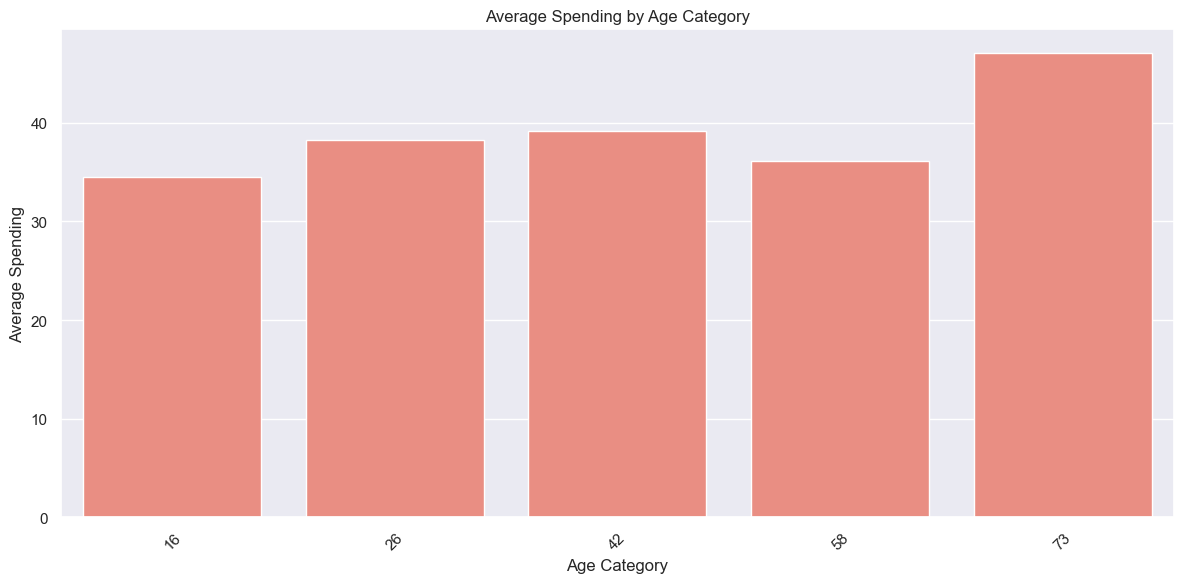

In [352]:
mean_spending = df.groupby('age_category')['tot_value_cui'].mean().reset_index()

plt.figure(figsize=(12, 6)) 
sns.barplot(data=mean_spending, x='age_category', y='tot_value_cui', color='salmon')
plt.title('Average Spending by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


#### Top 10 customers by total money spent ####

C:\Users\migue\AppData\Local\Temp\ipykernel_17388\2457345382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers,  x='customer_id',y='tot_value_cui', palette=palette)


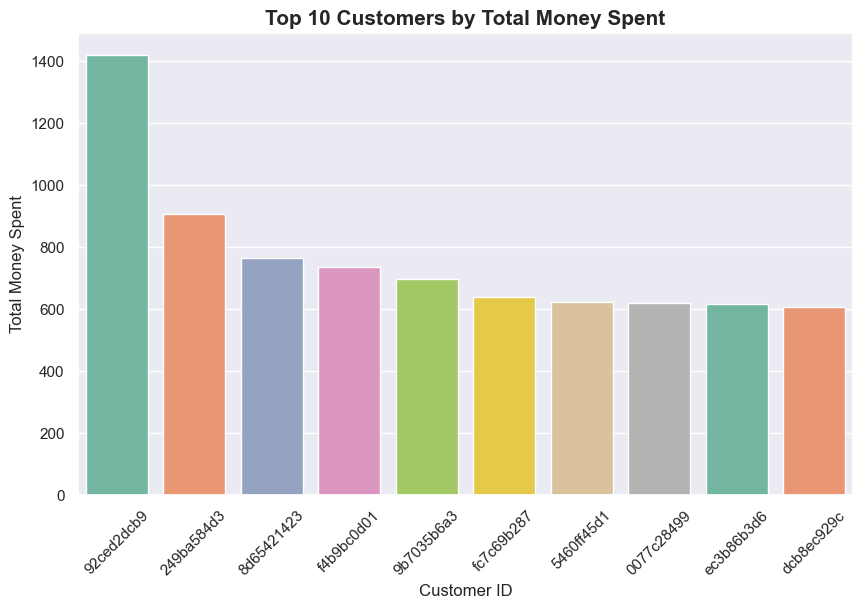

In [353]:
top_customers = df.sort_values(by='tot_value_cui', ascending=False).head(10)
palette = sns.color_palette("Set2", n_colors=10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers,  x='customer_id',y='tot_value_cui', palette=palette)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Money Spent', fontsize=12)
plt.title('Top 10 Customers by Total Money Spent', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

#### Customer age per city ####

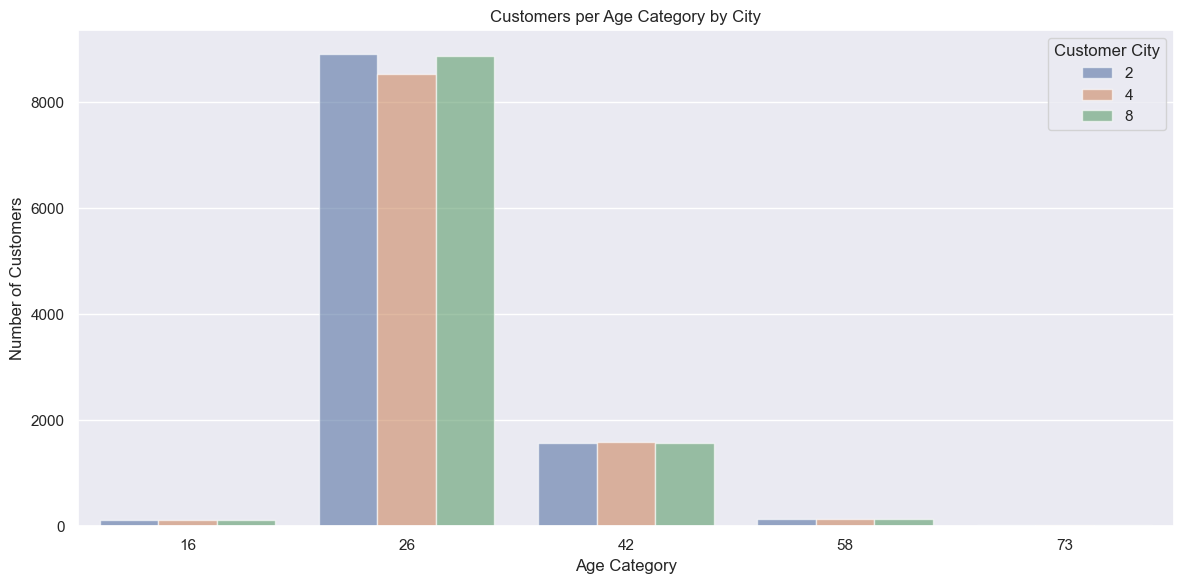

In [354]:
age_city_count = df.groupby(['age_category', 'customer_city']).size().reset_index(name='customer_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=age_city_count, x='age_category', y='customer_count', hue='customer_city', alpha=0.6)
plt.title('Customers per Age Category by City')
plt.xlabel('Age Category')
plt.ylabel('Number of Customers')
plt.legend(title='Customer City')

plt.tight_layout()
plt.show()

#### Total Products Order per Customer Region and Customer Age

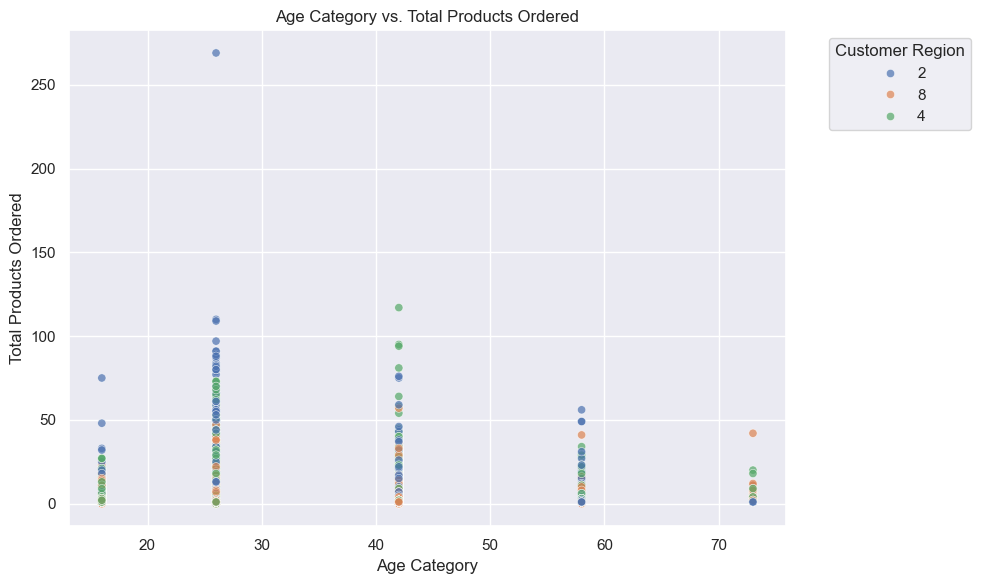

In [355]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_category', y='product_count', hue='customer_city', alpha=0.7)
plt.title('Age Category vs. Total Products Ordered')
plt.xlabel('Age Category')
plt.ylabel('Total Products Ordered')
plt.legend(title='Customer Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 3.3 Outliers analysis 

##### Identify which columns have outlier values

In [356]:
print(df.columns)

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'customer_city', 'chain_category', 'engagement_duration',
       'avg_order_frequency', 'tot_value_cui', 'preferred_order_day',
       'preferred_order_hour', 'age_category'],
      dtype='object')


In [357]:
# Identify numeric (metric) categorical (non-metric) columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display numeric and categorical columns
print("Numeric (Metric) Columns:")
print(numeric_columns.tolist())
print("\nCategorical (Non-Metric) Columns:")
print(categorical_columns.tolist())

Numeric (Metric) Columns:
['vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'engagement_duration', 'avg_order_frequency', 'tot_value_cui', 'age_category']

Categorical (Non-Metric) Columns:
['customer_id', 'customer_region', 'last_promo', 'payment_method', 'customer_city', 'chain_category']


### Display number of outliers for each feature 

In [358]:
outliers_count = {}

# IQR Method
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                
    # Limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers 
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_count[col] = num_outliers


for col, count in outliers_count.items():
    print(f"Column: {col}, Number of Outliers: {count}")

Column: vendor_count, Number of Outliers: 1523
Column: product_count, Number of Outliers: 2370
Column: is_chain, Number of Outliers: 3154
Column: first_order, Number of Outliers: 0
Column: last_order, Number of Outliers: 0
Column: CUI_American, Number of Outliers: 3507
Column: CUI_Asian, Number of Outliers: 3472
Column: CUI_Beverages, Number of Outliers: 5431
Column: CUI_Cafe, Number of Outliers: 1366
Column: CUI_Chicken Dishes, Number of Outliers: 3248
Column: CUI_Chinese, Number of Outliers: 3522
Column: CUI_Desserts, Number of Outliers: 2016
Column: CUI_Healthy, Number of Outliers: 2169
Column: CUI_Indian, Number of Outliers: 3448
Column: CUI_Italian, Number of Outliers: 6448
Column: CUI_Japanese, Number of Outliers: 6300
Column: CUI_Noodle Dishes, Number of Outliers: 2226
Column: CUI_OTHER, Number of Outliers: 7041
Column: CUI_Street Food / Snacks, Number of Outliers: 4244
Column: CUI_Thai, Number of Outliers: 2378
Column: DOW_0, Number of Outliers: 1405
Column: DOW_1, Number of Ou

### Treating outliers from numerical features (metric)

In [359]:
df_cleaned = df.copy()

# Exclude features from this step 
exclude_prefixes = ['CUI_', 'HR_', 'DOW_','age_category']
columns_to_treat = [col for col in numeric_columns if not any(col.startswith(prefix) for prefix in exclude_prefixes)]

for col in columns_to_treat:
    Q1 = df_cleaned[col].quantile(0.25)  
    Q3 = df_cleaned[col].quantile(0.75)  
    IQR = Q3 - Q1                       
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound,
                               np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col]))


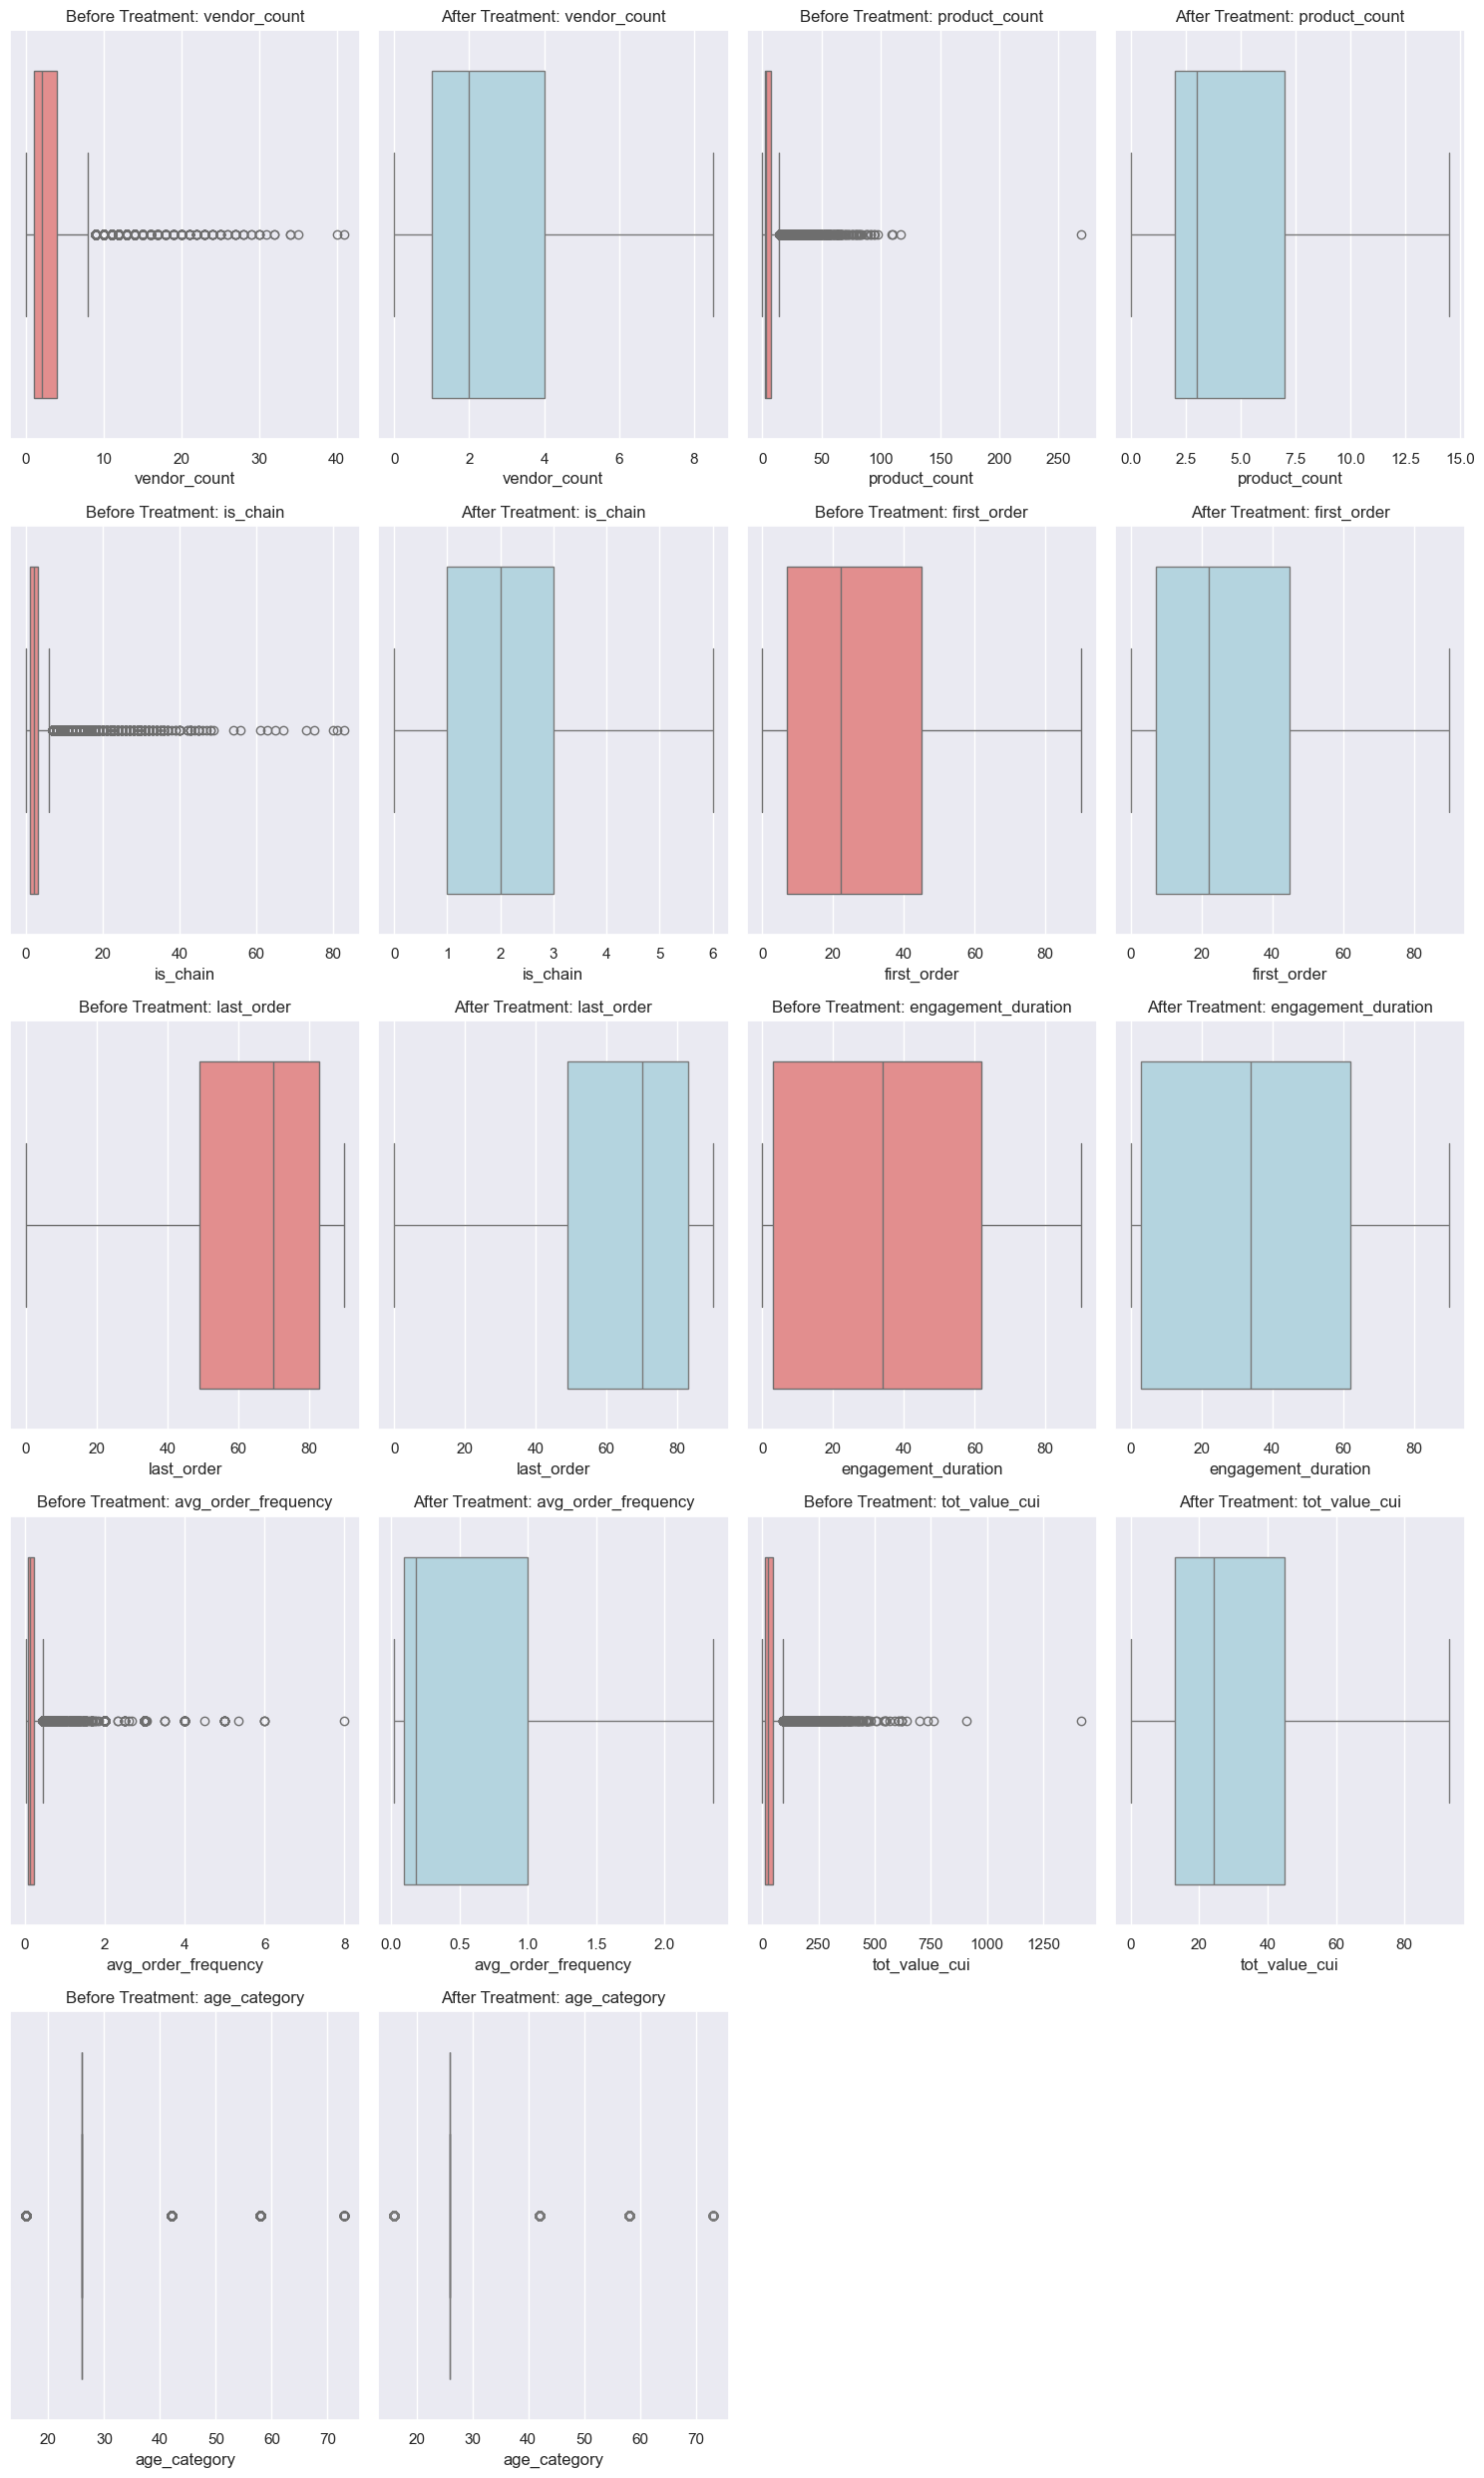

In [360]:
plots_per_row = 2  

columns_to_plot = [col for col in numeric_columns if not any(col.startswith(prefix) for prefix in ['CUI_', 'HR_', 'DOW_'])]
num_vars = len(columns_to_plot)  
num_rows = -(-num_vars // plots_per_row)  

fig, axes = plt.subplots(num_rows, plots_per_row * 2, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=col, color='lightcoral', ax=axes[i * 2])
    axes[i * 2].set_title(f"Before Treatment: {col}")

    sns.boxplot(data=df_cleaned, x=col, color='lightblue', ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f"After Treatment: {col}")
for i in range(len(columns_to_plot) * 2, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

###  Outlier Treatment Analysis

- **Significant Improvement**: Variables such as `customer_age`, `vendor_count`, and `product_count`, `total cuisini value`, `average frequency order` exhibit reduced extremes, indicating effective outlier capping.
- **Stable Features**: Variables like `first_order` and `preferred_order_day/hour` remain unaffected, reflecting no significant outliers present.
- **Enhanced Distributions**: Most variables now show more compact and consistent distributions, reducing skewness and improving data quality for analysis.
- `age category`wasnt treated

### Categorical features (non metric)

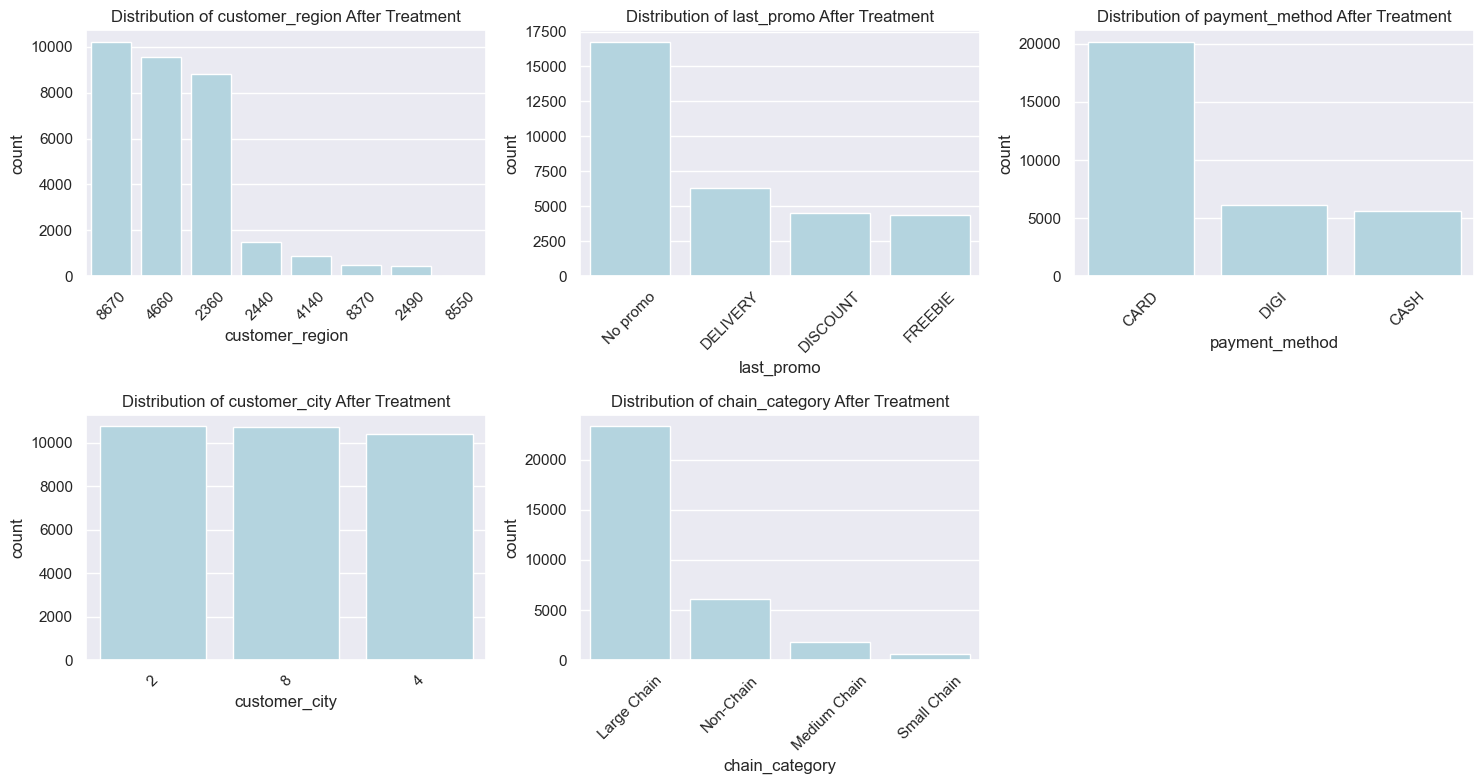

In [361]:
plots_per_row = 3
categorical_columns_filtered = [col for col in categorical_columns if col != 'customer_id']  
num_rows = -(-len(categorical_columns_filtered) // plots_per_row)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_columns_filtered):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], color='lightblue')
    axes[i].set_title(f"Distribution of {col} After Treatment")
    axes[i].tick_params(axis='x', rotation=45)


for i in range(len(categorical_columns_filtered), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Display number of outliers for each feature

In [362]:
outliers_remaining = {}

for col in numeric_columns:
    Q1 = df_cleaned[col].quantile(0.25)  
    Q3 = df_cleaned[col].quantile(0.75) 
    IQR = Q3 - Q1                       

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()
    outliers_remaining[col] = num_outliers

print("Outliers Remaining After Treatment:")
for col, count in outliers_remaining.items():
    print(f"Column: {col}, Number of Outliers: {count}")

Outliers Remaining After Treatment:
Column: vendor_count, Number of Outliers: 0
Column: product_count, Number of Outliers: 0
Column: is_chain, Number of Outliers: 0
Column: first_order, Number of Outliers: 0
Column: last_order, Number of Outliers: 0
Column: CUI_American, Number of Outliers: 3507
Column: CUI_Asian, Number of Outliers: 3472
Column: CUI_Beverages, Number of Outliers: 5431
Column: CUI_Cafe, Number of Outliers: 1366
Column: CUI_Chicken Dishes, Number of Outliers: 3248
Column: CUI_Chinese, Number of Outliers: 3522
Column: CUI_Desserts, Number of Outliers: 2016
Column: CUI_Healthy, Number of Outliers: 2169
Column: CUI_Indian, Number of Outliers: 3448
Column: CUI_Italian, Number of Outliers: 6448
Column: CUI_Japanese, Number of Outliers: 6300
Column: CUI_Noodle Dishes, Number of Outliers: 2226
Column: CUI_OTHER, Number of Outliers: 7041
Column: CUI_Street Food / Snacks, Number of Outliers: 4244
Column: CUI_Thai, Number of Outliers: 2378
Column: DOW_0, Number of Outliers: 1405


The following categories have not undergone outlier treatment:

- **Cuisine Types** (`CUI_`): These features represent the monetary amount spent on different types of cuisine by customers.
- **Hour of the Day** (`HR_`): These features capture the number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).
- **Day of the Week** (`DOW_`): These features indicate the number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).

These features were excluded from the outlier treatment process to preserve their natural distribution and avoid distorting the original data patterns. And one of the next steps is going to be deleting the columns HR_ and DOW_ because we can extract usefuul insights from the new features we create called: prefered order day and hour. 

# Feature Selection for Clustering
Using the meaning of variables in the dataset, the following features are identified as relevant for clustering:

### **Relevant Features**
1. - `customer_age`: Useful for demographic segmentation.
2. - `vendor_count` and `product_count`: Show diversity and quantity of interactions with the platform.
3. - `CUI_*`: Represents monetary spending on different cuisine types, reflecting customer preferences.
4. - `total_cuisine` and `avg_order_frequency`: Aggregate information, such as total spending and average order frequency.
5. - `preferred_order_day` and `preferred_order_hour`: Explain the customer's preferred order day and hour.

### **Less Useful Features**
1. `customer_id`: Acts as a unique identifier.
2. `first_order` and `last_order`: Temporal variables that could be redundant if not normalized.
3. `payment_method` and `last_promo`: Limited impact on clustering in the current context.


In [363]:
#To make the opperations easier we will create a new df with only the metric features
metric_df = df_cleaned[metric_features]

In [364]:
# Check the feature names in metric_df
metric_df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'engagement_duration',
       'avg_order_frequency', 'tot_value_cui', 'preferred_order_day',
       'preferred_order_hour', 'age_category'],
      dtype='object')

We have some features that are redudant such as all  the HR and the DOW. We can start by removing them from this df. Cause we will keep the the preferred_order_day and the preferred_order_hour that retains the important info of the HR and DOW columns. Also the avg_order_frequency can be removed since it has missing values and no relevant information. 
We took the decision of removing first order and last order since there is already the feature engagement duration the resumes the relevant information from these two columns.

In [365]:
# List of features to remove (DOW_*, HR_* columns)
features_to_remove = [col for col in metric_df.columns if col.startswith('DOW_') or col.startswith('HR_')]

# Remove the granular features
metric_df = metric_df.drop(columns=features_to_remove)

# Remove the avg_order_frequency feature

metric_df = metric_df.drop(columns=['avg_order_frequency','first_order','last_order'])

# Verify the remaining feature names
print(metric_df.columns)


Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai',
       'engagement_duration', 'tot_value_cui', 'preferred_order_day',
       'preferred_order_hour', 'age_category'],
      dtype='object')


### Correlation Matrix
High correlation (>0.8): Variables like vendor_count and product_count might be redundant. Choose the most representative one.
Low correlation (~0): Variables with little relationship to others may not contribute meaningfully to clustering.

In [366]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the metric_df
scaler.fit(metric_df)

# Transform the metric_df
scaled_metrics = scaler.transform(metric_df)  # Scaled numeric features as a NumPy array

# Convert the scaled metrics back to a DataFrame
scaled_metrics_df = pd.DataFrame(scaled_metrics, columns=metric_df.columns, index=metric_df.index)


# Display the scaled metric DataFrame
print(scaled_metrics_df)


             customer_age  vendor_count  product_count  is_chain  \
customer_id                                                        
1b8f824d5e      -1.339552     -0.441973       0.012998 -0.638215   
5d272b9dcb      -1.480444     -0.441973      -0.732609 -0.125794   
f6d1b2ba63       1.478282     -0.917586      -0.732609 -0.125794   
180c632ed8      -0.494202     -0.441973      -0.484073 -0.638215   
4eb37a6705      -1.057769     -0.441973       0.012998 -1.150635   
...                   ...           ...            ...       ...   
f4e366c281       0.351149     -0.917586      -0.981145 -0.638215   
f6b6709018      -0.353310     -0.917586      -0.981145 -1.150635   
f74ad8ce3f      -0.494202     -0.917586      -0.981145 -0.638215   
f7b19c0241       0.914715     -0.917586      -0.981145 -1.150635   
fd40d3b0e0       0.351149     -0.917586      -0.981145 -1.150635   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                       

customer_age                0
vendor_count                0
product_count               0
is_chain                    0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
engagement_duration         0
tot_value_cui               0
preferred_order_day         0
preferred_order_hour        0
age_category                0
dtype: int64


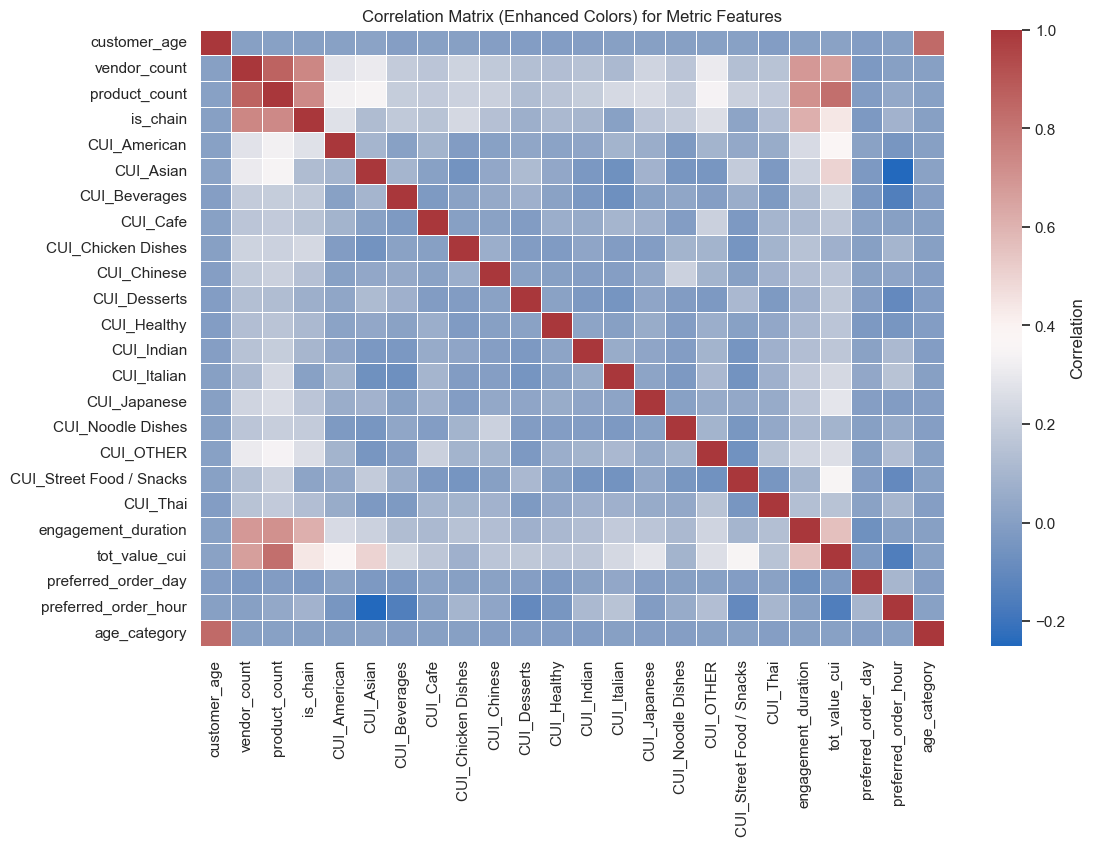


Additional Insights:
Maximum Correlation (excluding diagonal): 0.86
Minimum Correlation (excluding diagonal): -0.25


In [367]:
# Select numeric columns only from the metric_df
numeric_metric_df = metric_df.select_dtypes(include=['float64', 'int64','int32'])

# Check for missing or non-numeric values
print(numeric_metric_df.isnull().sum())

# Fill or drop missing values if necessary
numeric_metric_df = numeric_metric_df.dropna()  # Drop rows with missing values

# Calculate the correlation matrix
correlation_matrix = numeric_metric_df.corr()

# Plot the heatmap with a different color palette
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='vlag', cbar_kws={'label': 'Correlation'}, linewidths=0.5)
plt.title("Correlation Matrix (Enhanced Colors) for Metric Features")
plt.show()

# Displaying additional insights as text
max_corr = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool)).max().max()
min_corr = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool)).min().min()

print(f"\nAdditional Insights:")
print(f"Maximum Correlation (excluding diagonal): {max_corr:.2f}")
print(f"Minimum Correlation (excluding diagonal): {min_corr:.2f}")


In [368]:
# Define a threshold for strong correlations
threshold = 0.80

# Calculate the correlation matrix for the metric_df (already cleaned from NaN and infinite values)
correlation_matrix = numeric_metric_df.corr()

# Use the absolute values of the correlation matrix (to check for both positive and negative correlations)
correlation_matrix = correlation_matrix.abs()

# Remove the diagonal (self-correlation) by keeping only the upper triangle
correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of features with correlation above the threshold
strong_correlations = correlation_matrix.stack().reset_index()
strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter the pairs with correlation greater than the threshold
strong_correlations = strong_correlations[strong_correlations['Correlation'] > threshold]

# Display the pairs of features with high correlation
print("Highly correlated features (threshold > 0.8):")
for index, row in strong_correlations.iterrows():
    print(f"{row['Feature 1']} and {row['Feature 2']}: Correlation = {row['Correlation']:.2f}")


Highly correlated features (threshold > 0.8):
customer_age and age_category: Correlation = 0.84
vendor_count and product_count: Correlation = 0.86
product_count and tot_value_cui: Correlation = 0.82


From this information we can consider to drop customer_age, and also product_count due to high correlation to the other variables.

In [369]:
# Remove 'customer_age' and 'product_count' from the metric_df
metric_df = metric_df.drop(columns=['customer_age', 'product_count'])


In [370]:
# Count the number of columns in the metric_df
num_columns = len(metric_df.columns)

# Print the number of columns
print("Number of columns:", num_columns)
metric_df.columns

Number of columns: 22


Index(['vendor_count', 'is_chain', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration',
       'tot_value_cui', 'preferred_order_day', 'preferred_order_hour',
       'age_category'],
      dtype='object')

StandarScaler 

In [371]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(metric_df[['vendor_count', 'is_chain', 
                                       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                                       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                                       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
                                       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                                       'CUI_Thai', 'engagement_duration', 'tot_value_cui', 
                                       'preferred_order_day', 'preferred_order_hour', 
                                       'age_category']])


In [372]:
#Saving df in order to proceed with clustering
metric_df.to_csv('Processed_Data.csv', index=False)

#### Features that are going to be used in the clustering process
From the 57 columns with the pre processe we end with 22 relevent features

| Feature                        | Description                                                                             |
|--------------------------------|-----------------------------------------------------------------------------------------|
| `vendor_count`                 | Number of unique vendors the customer has ordered from.                                 |
| `is_chain`                     | Indicates whether the customer’s order was from a chain restaurant.                     |
| `CUI_American`                 | Amount spent by the customer on American cuisine.                                       |
| `CUI_Asian`                    | Amount spent by the customer on Asian cuisine.                                          |
| `CUI_Beverages`                | Amount spent by the customer on beverages.                                              |
| `CUI_Cafe`                     | Amount spent by the customer on café items.                                             |
| `CUI_Chicken Dishes`           | Amount spent by the customer on chicken dishes.                                         |
| `CUI_Chinese`                  | Amount spent by the customer on Chinese cuisine.                                        |
| `CUI_Desserts`                 | Amount spent by the customer on desserts.                                               |
| `CUI_Healthy`                  | Amount spent by the customer on healthy food.                                           |
| `CUI_Indian`                   | Amount spent by the customer on Indian cuisine.                                         |
| `CUI_Italian`                  | Amount spent by the customer on Italian cuisine.                                        |
| `CUI_Japanese`                 | Amount spent by the customer on Japanese cuisine.                                       |
| `CUI_Noodle Dishes`            | Amount spent by the customer on noodle dishes.                                          |
| `CUI_OTHER`                    | Amount spent by the customer on other types of cuisine.                                 |
| `CUI_Street Food / Snacks`     | Amount spent by the customer on street food and snacks.                                 |
| `CUI_Thai`                     | Amount spent by the customer on Thai cuisine.                                           |
| `engagement_duration`          | Duration of the customer’s engagement with the platform.                                |
| `tot_value_cui`                | Total amount spent by the customer across all cuisine types.                            |
| `preferred_order_day`          | The day of the week the customer prefers to place orders.                               |
| `preferred_order_hour`         | The hour of the day the customer prefers to place orders.                               |
| `age_category`                 | Age category of the customer.                                                           |
